In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Complete analysis on ASD.csv')

In [33]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Mom_age,Qchat-10-Score,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,traits,age-group
0,0,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,1,0,family member,1,Toddlers
1,1,1,0,0,0,0,0,1,1,0,1,36,4,m,Middle Eastern,1,0,family member,1,Toddlers
2,2,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic or Latino,0,0,family member,1,Toddlers
3,3,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,0,1,family member,1,Toddlers
4,4,1,1,0,0,1,1,1,1,1,1,21,8,m,Black,0,0,family member,1,Toddlers


In [19]:
within24_36= pd.get_dummies(df['Mom_age']>24,drop_first=True)
within0_12 = pd.get_dummies(df['Mom_age']<13,drop_first=True)
male=pd.get_dummies(df['Gender'],drop_first=True)
age_group=pd.get_dummies(df['age-group'],drop_first=True)
ethnics=pd.get_dummies(df['Ethnicity'],drop_first=True)
jaundice=pd.get_dummies(df['Jaundice'],drop_first=True)
ASD_genes=pd.get_dummies(df['Family_mem_with_ASD'],drop_first=True)
ASD_traits=pd.get_dummies(df['traits'],drop_first=True)

In [34]:
df["Ethnicity"] = df['Ethnicity'].replace('Native Indian', 'Others')

In [31]:
data = pd.concat([within24_36,within0_12,male,age_group,ethnics,jaundice,ASD_genes,ASD_traits],axis=1)

In [35]:
data.columns = ['within24_36','within0_12','male','toddlers','adolescents','adults','White European','Middle Eastern','Hispanic or Latino','Black','Asian','Pacifica','Turkish','Others','jaundice','ASD_genes','ASD_traits']

In [36]:
data.head()

,within24_36,within0_12,male,toddlers,adolescents,adults,White European,Middle Eastern,Hispanic or Latino,Black,Asian,Pacifica,Turkish,Others,jaundice,ASD_genes,ASD_traits
0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1
1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
4,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [38]:
data

,within24_36,within0_12,male,toddlers,adolescents,adults,White European,Middle Eastern,Hispanic or Latino,Black,Asian,Pacifica,Turkish,Others,jaundice,ASD_genes,ASD_traits
0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1
1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
4,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1197,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1198,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1199,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Logistic Regression Model Fitting

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Predicting the test set results and calculating the accuracy

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [56]:
# Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 63  26]
 [ 29 243]]


In [57]:
# The result is telling us that we have 63+243 correct predictions and 29+26 incorrect predictions.

In [58]:
# Compute precision, recall, F-measure and support
# To quote from Scikit Learn:
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false 
# positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is 
# negative.
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false 
# negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score 
# reaches its best value at 1 and worst score at 0.
# The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and 
# precision are equally important.
# The support is the number of occurrences of each class in y_test.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70        89
           1       0.90      0.89      0.90       272

    accuracy                           0.85       361
   macro avg       0.79      0.80      0.80       361
weighted avg       0.85      0.85      0.85       361



In [59]:
# Interpretation:
# So based on the Logistic Regression model on above dataset, if anyone provides person's age,gender,ethnicity,
# jaundice while birth? and any relative having ASD traits?, the model can predict either the person has ASD 
# or not with precision of 85%

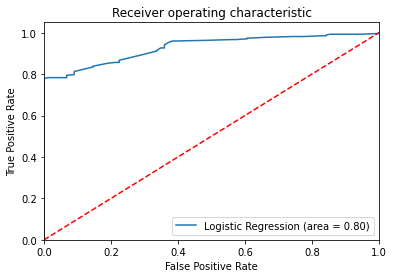

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [62]:
scaler.fit(X)
scaled_features = scaler.transform(X)

In [63]:
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()

,within24_36,within0_12,male,toddlers,adolescents,adults,White European,Middle Eastern,Hispanic or Latino,Black,Asian,Pacifica,Turkish,Others,jaundice,ASD_genes
0,0.494530,-0.16006,0.742751,-0.525644,-0.040842,0.806055,-0.246889,-0.261735,-0.377785,-0.050042,-0.301374,-0.104608,-0.057807,1.317484,1.883943,-0.432156
1,0.494530,-0.16006,0.742751,-0.525644,-0.040842,0.806055,-0.246889,-0.261735,2.647011,-0.050042,-0.301374,-0.104608,-0.057807,-0.759023,1.883943,-0.432156
2,-2.022123,-0.16006,0.742751,-0.525644,-0.040842,0.806055,-0.246889,3.820655,-0.377785,-0.050042,-0.301374,-0.104608,-0.057807,-0.759023,-0.530802,-0.432156
3,-2.022123,-0.16006,-1.346346,-0.525644,-0.040842,0.806055,-0.246889,-0.261735,-0.377785,-0.050042,-0.301374,-0.104608,-0.057807,1.317484,-0.530802,2.313979
4,-2.022123,-0.16006,0.742751,-0.525644,-0.040842,0.806055,4.050407,-0.261735,-0.377785,-0.050042,-0.301374,-0.104608,-0.057807,-0.759023,-0.530802,-0.432156


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

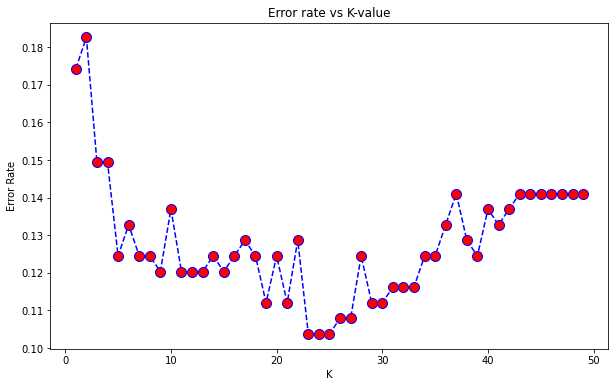

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [121]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [122]:
pred_knn=knn.predict(X_test)
# print(confusion_matrix(y_test,pred_knn))
# print(classification_report(y_test,pred_knn))

In [123]:
confusion_matrix= confusion_matrix(y_test, pred_knn)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [124]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        53
           1       0.93      0.91      0.92       188

    accuracy                           0.88       241
   macro avg       0.82      0.83      0.83       241
weighted avg       0.88      0.88      0.88       241

